# Lab 06

In [2]:
import networkx as nx
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm.notebook import tqdm

from utils.plotting import set_white_ticks, pretty_draw, draw_degree_histogram, get_context_for_dark_IDE
from utils.analysis import estimate_graph_alpha
import generators.barabasi_albert as BA

%matplotlib inline

random.seed(42)
np.random.seed(42)

## Intro tasks [40%]
### E6.1

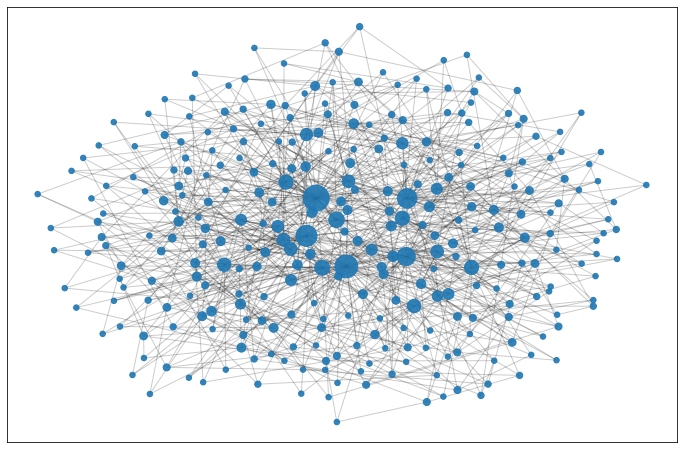

In [3]:
M = 3
INIT_SIZE = 5
FINAL_SIZE = 300
SEED_SRC = 42

np.random.seed(SEED_SRC)
BA_generator = BA.BA_Generator(INIT_SIZE, FINAL_SIZE, M)
BA_graph = BA_generator.get_original()
pretty_draw(BA_graph)

### E6.2

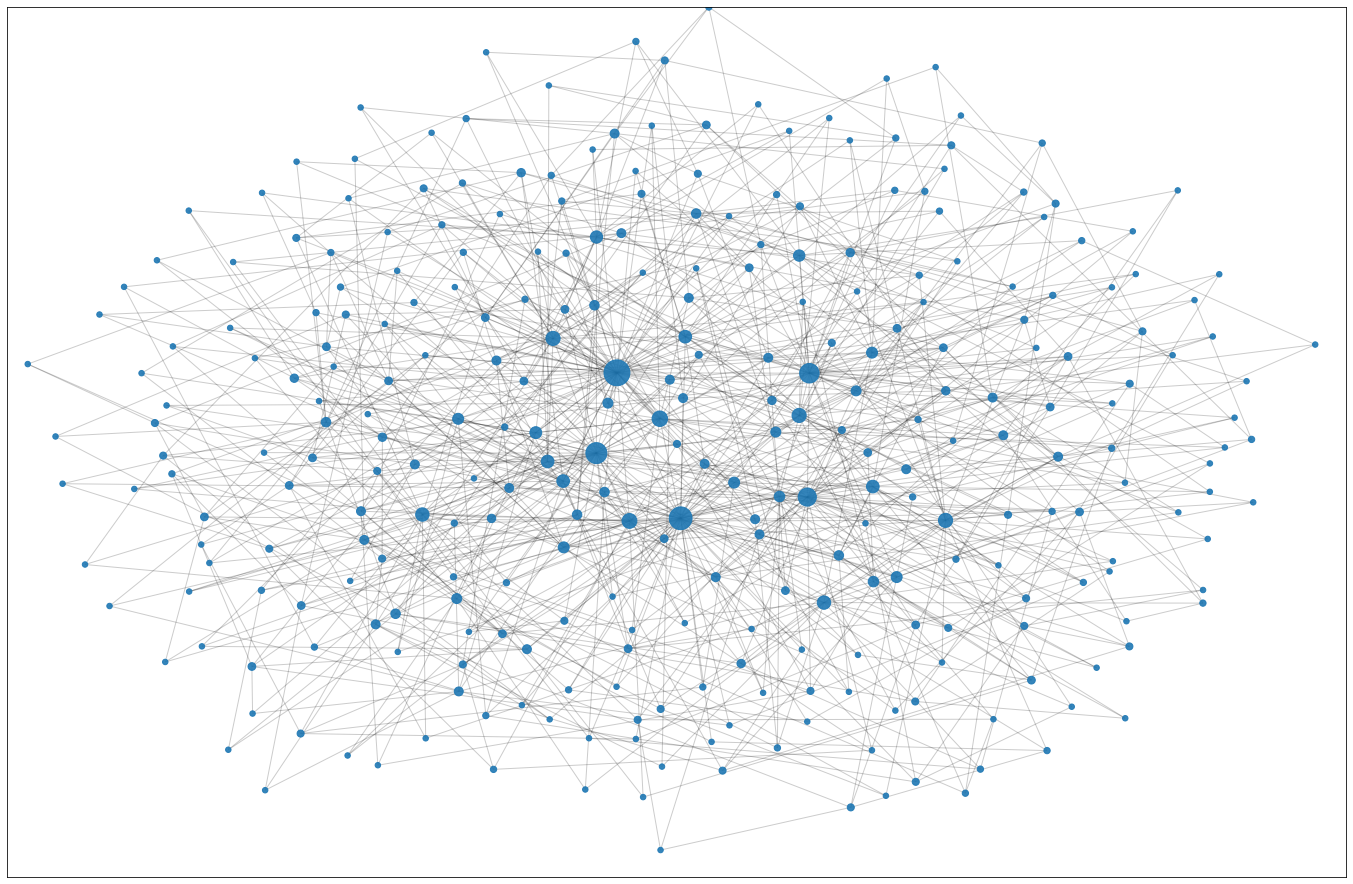

In [8]:
class Workaround:
    def __init__(self):
        self.n = 0

    def update(self):
        self.n += 1

# Could take same time
pos = nx.kamada_kawai_layout(BA_graph)
fig, ax = plt.subplots(figsize=(24,16))
anime_G = nx.generators.complete_graph(INIT_SIZE)
BA_generator.set_G(anime_G)
init_size = len(anime_G.nodes())

total = FINAL_SIZE-INIT_SIZE
pbar = tqdm(total=total)
counter = Workaround()

def update(frame, *fargs):
    pbar.update(1)
    ax.clear()
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    v = counter.n + init_size
    counter.update()
    BA_generator.exec_step(v, 'original')
    dgrs = dict(anime_G.degree)
    nx.draw_networkx_nodes(anime_G, pos=pos, ax=ax, node_size=[v * 10 for v in dgrs.values()], alpha=0.9)
    nx.draw_networkx_edges(anime_G, pos=pos, ax=ax, alpha=0.2)

# reset seed in order to generate same graph
np.random.seed(SEED_SRC)
ani = anim.FuncAnimation(fig, update, frames=range(total-1), interval=200, repeat=False, blit=False)
path = '../animation/BA.gif'
ani.save(path)
pbar.close()


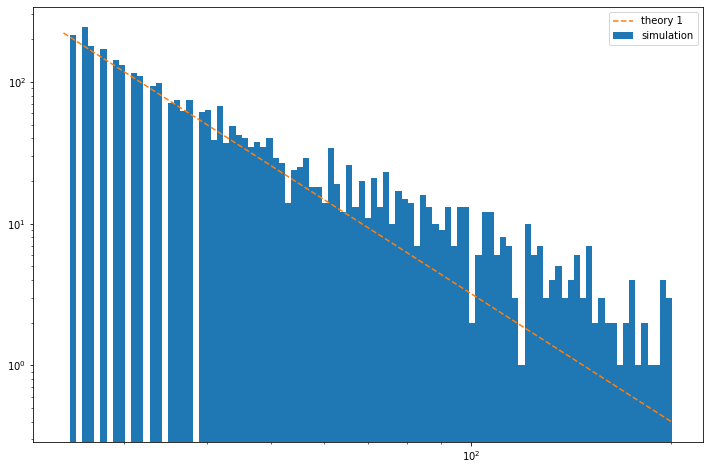

In [4]:
M = 4
FINAL_SIZE = 100_000
g = nx.generators.barabasi_albert_graph(FINAL_SIZE, M)

dgrs = dict(g.degree).values()
MIN, MAX = M, 10
num = 100
X = np.logspace(np.log(MIN), np.log(MAX), num)

with get_context_for_dark_IDE():
    fig, ax = plt.subplots(figsize=(12,8))
    ax.hist(dgrs, bins=X, label='simulation')
    Y_theor = [2*M*M / (k*k*k) *FINAL_SIZE for k in X]
    ax.plot(X, Y_theor, '--', label='theory 1')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.legend()

### E6.4

In [50]:
print('Estimated alpha: ', estimate_graph_alpha(BA_graph)) # should be 3

Estimated alpha:  2.586296030590917


### E6.5

In [3]:
def plot_ki_simulation(X, Y, idxs):
    plt.figure(figsize=(10, 6))
    for i, idx in enumerate(idxs):
        plt.plot(X,Y[i], label=f'node {idx}')
    plt.xlabel('t')
    plt.ylabel('ki')
    plt.legend()

def setup_sim():
    np.random.seed(SEED_SRC)
    return dict(
        idxs = [6, 30, 60],
        M = 3,
        INIT_SIZE = 5,
        FINAL_SIZE = 300,
        N = 10,
    )

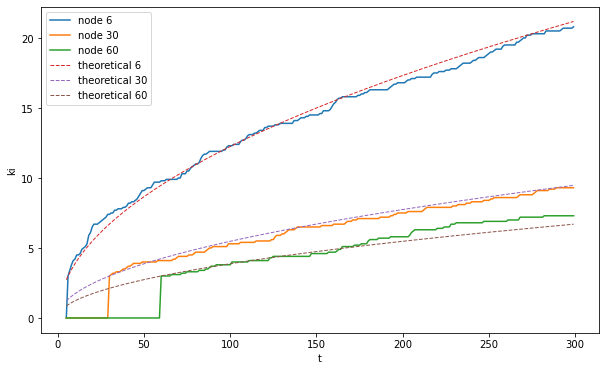

In [4]:
params = setup_sim()
X = range(params['INIT_SIZE'], params['FINAL_SIZE'])
Y = [[0 for j in X] for i in params['idxs']]

for _ in range(params['N']):
    init_G = nx.generators.complete_graph(params['INIT_SIZE'])
    BA_generator.set_G(init_G)
    for v in X:
        BA_generator.exec_step(v, 'original')
        for i, idx in enumerate(params['idxs']):
            if v >= idx:
                Y[i][v-INIT_SIZE] += (init_G.degree(idx) / params['N'])


with get_context_for_dark_IDE():
    plot_ki_simulation(X,Y,params['idxs'])
    for ti in params['idxs']:
        Y_teor = [params['M'] * np.sqrt(t / ti) for t in X]
        plt.plot(X, Y_teor, '--', linewidth=1, label=f'theoretical {ti}')
    plt.legend()
plt.show()

## P6.4 [30%]

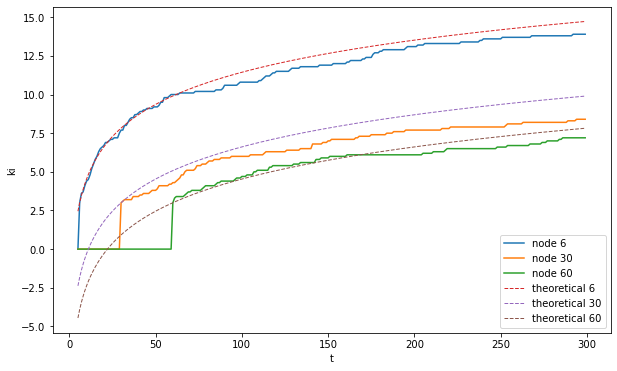

In [9]:
params = setup_sim()
X = range(params['INIT_SIZE'], params['FINAL_SIZE'])
Y = [[0 for j in X] for i in params['idxs']]

for _ in range(params['N']):
    init_G = nx.generators.complete_graph(params['INIT_SIZE'])
    BA_generator.set_G(init_G)
    for v in X:
        BA_generator.exec_step(v, 'A')
        for i, idx in enumerate(params['idxs']):
            if v >= idx:
                Y[i][v-INIT_SIZE] += init_G.degree(idx) / params['N']

with get_context_for_dark_IDE():
    plot_ki_simulation(X,Y,params['idxs'])
    for ti in params['idxs']:
        Y_teor = [params['M']*np.log(t/ti) + params['M'] for t in X]
        plt.plot(X, Y_teor, '--', linewidth=1, label=f'theoretical {ti}')
    plt.legend()
plt.show()

## P6.5 [30%]

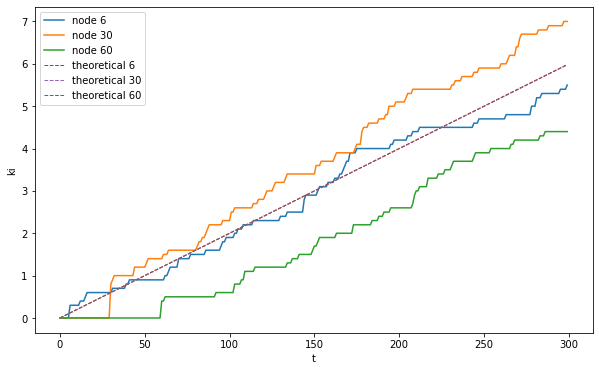

In [7]:
params = setup_sim()
X = range(params['FINAL_SIZE'])
Y = [[0 for j in X] for i in params['idxs']]

for _ in range(params['N']):
    init_G = nx.generators.empty_graph(params['FINAL_SIZE'])
    BA_generator.set_G(init_G)
    for v in X:
        BA_generator.exec_step(v, 'B')
        for i, idx in enumerate(params['idxs']):
            if v >= idx:
                Y[i][v] += init_G.degree(idx) / params['N']

with get_context_for_dark_IDE():
    plot_ki_simulation(X,Y,params['idxs'])
    for ti in params['idxs']:
        Y_teor = [2*t * params['M'] / params['FINAL_SIZE'] for t in X]
        plt.plot(X, Y_teor, '--', linewidth=1, label=f'theoretical {ti}')
    plt.legend()

plt.show()